To realize a **filter** using **6-point averaging** and **6-point differencing**, you need to implement their respective **difference equations**. Here’s how both filters are defined and realized in practice:

---

### 🔹 1. **6-Point Averaging Filter**

This is a **moving average filter** that smooths the signal by averaging 6 consecutive samples.

#### Difference Equation:

$$
y[n] = \frac{1}{6} \left( x[n] + x[n-1] + x[n-2] + x[n-3] + x[n-4] + x[n-5] \right)
$$

#### Realization Steps:

* Store the current and 5 previous input samples.
* Sum them and divide by 6.
* Output the result as $y[n]$.

This is a **low-pass FIR filter**.

---

### 🔹 2. **6-Point Differencing Filter**

This filter emphasizes changes between consecutive samples and is typically used for edge detection or high-pass filtering.

#### Difference Equation (Simple 1st-order):

A 6-point central difference version may be approximated as:

$$
y[n] = \frac{1}{6} \left( x[n+3] - x[n-3] \right)
$$

Or a more accurate version (central difference):

$$
y[n] = \frac{1}{10} \left( -x[n-3] - 2x[n-2] - x[n-1] + x[n+1] + 2x[n+2] + x[n+3] \right)
$$

> Note: The second equation is better for signal differentiation and avoids bias.

#### Realization Steps:

* For the second version, store samples from $x[n-3]$ to $x[n+3]$.
* Apply weights: $-1, -2, -1, 0, 1, 2, 1$ and scale by $\frac{1}{10}$.
* Output the result.

This acts as a **high-pass FIR filter**.

---

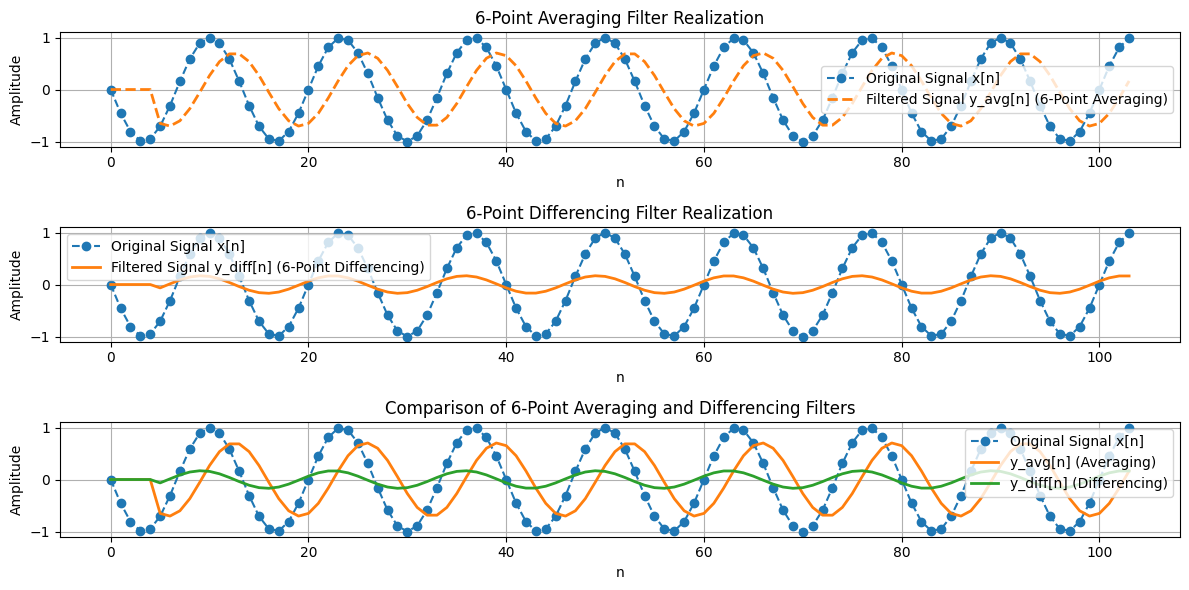

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Given signal x[n]
n = np.arange(-10, 21, .3)
x = np.sin(.5 * np.pi * n)
N = len(x)

# Initialize the output signals y_avg (for averaging filter) and y_diff (for differencing filter)
y_avg = np.zeros(N)
y_diff = np.zeros(N)

# Apply 6-point averaging filter
for n in range(5, N):
    y_avg[n] = (x[n] + x[n-1] + x[n-2] + x[n-3] + x[n-4] + x[n-5]) / 6

# Apply 6-point differencing filter
for n in range(5, N):
    y_diff[n] = (x[n] - x[n-1] + x[n-2] - x[n-3] + x[n-4] - x[n-5]) / 6

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for the original signal x[n] and the 6-point averaging filtered signal
plt.subplot(3, 1, 1)
plt.plot(x, label='Original Signal x[n]', linestyle='--', marker='o')
plt.plot(y_avg, label='Filtered Signal y_avg[n] (6-Point Averaging)',linestyle = '--' ,linewidth=2)
plt.title("6-Point Averaging Filter Realization")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Plot for the original signal x[n] and the 6-point differencing filtered signal
plt.subplot(3, 1, 2)
plt.plot(x, label='Original Signal x[n]', linestyle='--', marker='o')
plt.plot(y_diff, label='Filtered Signal y_diff[n] (6-Point Differencing)', linewidth=2)
plt.title("6-Point Differencing Filter Realization")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Plotting both signals together for comparison
plt.subplot(3, 1, 3)
plt.plot(x, label='Original Signal x[n]', linestyle='--', marker='o')
plt.plot(y_avg, label='y_avg[n] (Averaging)', linewidth=2)
plt.plot(y_diff, label='y_diff[n] (Differencing)', linewidth=2)
plt.title("Comparison of 6-Point Averaging and Differencing Filters")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()